In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib qt
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
sys.path.append('../utils')
import Aircraft3dofApproxModel
import FinaltimeFreeCost
import Aircraft3dofConstraints
from scipy.integrate import solve_ivp
from Scvx_tf_free import Scvx_tf_free
from Scaling import TrajectoryScaling

In [10]:
ix = 6
iu = 3
tf = 600
N = 50
delT = tf/N
max_iter = 200

In [11]:
myModel = Aircraft3dofApproxModel.Aircraft3dofApproxModel('Hello',ix,iu,linearization="numeric_central")
myCost = FinaltimeFreeCost.Finaltime('Hello',ix,iu,N)
myConst = Aircraft3dofConstraints.Aircraft3dof('Hello',ix,iu)

x_min = np.zeros(ix)
x_max = np.array([110*1e3,60*1e3,10*1e3,240,np.deg2rad(20),np.pi/2])
u_min = np.array([0,0,0])
u_max = np.array([1.52,np.deg2rad(15),1126.3 * 1e3]) 

myScaling = TrajectoryScaling(x_min,x_max,u_min,u_max,tf)

In [12]:
xi = np.array([0*1e3,0*1e3,10*1e3,240,0,0])
xf = np.array([110*1e3,-60*1e3,0,95,-np.deg2rad(3),np.deg2rad(80)])
# xf = np.array([110*1e3,-0*1e3,0,95,-np.deg2rad(0),np.deg2rad(0)])

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf

u0 = np.zeros((N+1,iu))
ui = np.array([0.5,np.deg2rad(0),0])
uf = np.array([0.5,-np.deg2rad(0),0])
for i in range(N+1) :
    u0[i] = (N-i)/N * ui + i/N * uf
    
# idx_c = int(26 * N / 50)
# for i in range(0,idx_c+1) :
#     u0[i,0] = (idx_c-i)/idx_c * 0.3 + i/idx_c * 0.15
# for i in range(idx_c+1,N+1) :
#     u0[i,0] = 1/700 * (i-idx_c-1)**2 + 0.15

In [13]:
# w_tr for time is 1
i1 = Scvx_tf_free('aircraft',N,tf,max_iter,myModel,myCost,myConst,myScaling,
          type_discretization='foh',w_c=1,w_vc=1e4,w_tr=1e1,tol_vc=1e-6,tol_tr=1e-6,tol_bc=1,flag_policyopt=False)
x,u,xbar,ubar,tfbar,total_num_iter,flag_boundary,l,l_vc,l_tr,x_traj,u_traj = i1.run(x0,u0,xi,xf)

iteration   total_cost        cost        ||vc||     ||tr||       reduction   w_tr        bounary
1           1174.523          555.116     1.07e-10    61.9        -575        10.000      0(8.43e+04)
2           1076.083          705.707     1.53e-11    37          98.4        10.000      0(6.27e+12)
3           662.201           531.737     4.19e-12    13          414         10.000      0(1.32e+05)
4           626.171           542.856     3.06e-10    8.33        36          10.000      0(1.05e+04)
5           541.303           537.554     1.2e-10     0.375       84.9        10.000      0(1.04e+03)
6           537.115           536.262     1.37e-10    0.0853      4.19        10.000      0(297)
7           535.918           535.481     1.36e-10    0.0437      1.2         10.000      0(194)
8           535.201           534.890     1.86e-10    0.0311      0.717       10.000      0(150)
9           534.694           534.470     1.87e-09    0.0225      0.507       10.000      0(100)
10  

84          532.466           532.466     5.11e-10    2.62e-05    0.000525    10.000      1(0.126)
85          532.466           532.466     4.63e-10    2.59e-05    0.00052     10.000      1(0.125)
86          532.465           532.465     4.17e-10    2.56e-05    0.000513    10.000      1(0.123)
87          532.465           532.465     3.72e-10    2.53e-05    0.000508    10.000      1(0.122)
88          532.464           532.464     3.3e-10     2.5e-05     0.000501    10.000      1(0.12)
89          532.464           532.464     2.97e-10    2.47e-05    0.000495    10.000      1(0.119)
90          532.463           532.463     2.71e-10    2.44e-05    0.000491    10.000      1(0.118)
91          532.463           532.463     2.49e-10    2.41e-05    0.000486    10.000      1(0.116)
92          532.462           532.462     2.51e-10    2.39e-05    0.00048     10.000      1(0.115)
93          532.462           532.462     2.76e-10    2.36e-05    0.000474    10.000      1(0.114)
94         

167         532.443           532.443     2.74e-10    7.65e-06    0.000154    10.000      1(0.0331)
168         532.443           532.443     2.75e-10    7.6e-06     0.000152    10.000      1(0.0326)
169         532.443           532.443     2.76e-10    7.55e-06    0.000151    10.000      1(0.0323)
170         532.443           532.443     2.77e-10    7.5e-06     0.00015     10.000      1(0.0322)
171         532.443           532.442     2.78e-10    7.45e-06    0.000151    10.000      1(0.0323)
172         532.442           532.442     2.79e-10    7.4e-06     0.000147    10.000      1(0.0315)
173         532.442           532.442     2.8e-10     7.35e-06    0.000147    10.000      1(0.0315)
174         532.442           532.442     2.81e-10    7.31e-06    0.000148    10.000      1(0.0316)
175         532.442           532.442     2.82e-10    7.26e-06    0.000144    10.000      1(0.0308)
176         532.442           532.442     2.83e-10    7.21e-06    0.000145    10.000      1(0.031)
1

In [14]:
print(tfbar)

532.43864639679


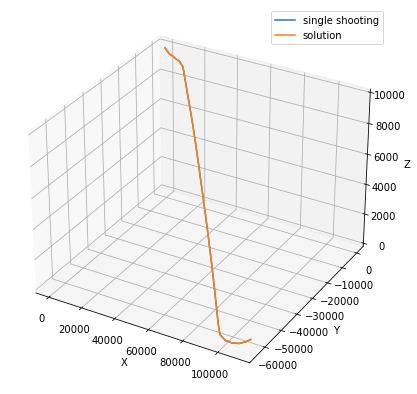

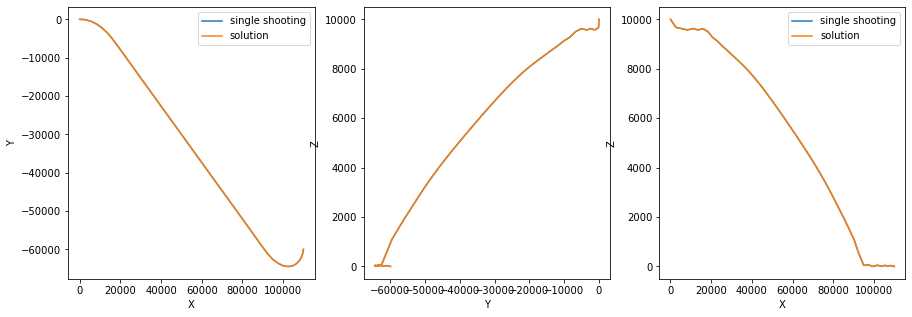

In [15]:
fig = plt.figure(1,figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot(x[:, 0], x[:, 1], x[:, 2],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],label='solution')
plt.legend()
fig = plt.figure(2,figsize=(15,5))
ax = fig.add_subplot(131)
ax.plot(x[:, 0], x[:, 1],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 1],label='solution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()
ax = fig.add_subplot(132)
ax.plot(x[:, 1], x[:, 2],label='single shooting')
ax.plot(xbar[:, 1], xbar[:, 2],label='solution')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax = fig.add_subplot(133)
ax.plot(x[:, 0], x[:, 2],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 2],label='solution')
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.legend()
# ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],'o')

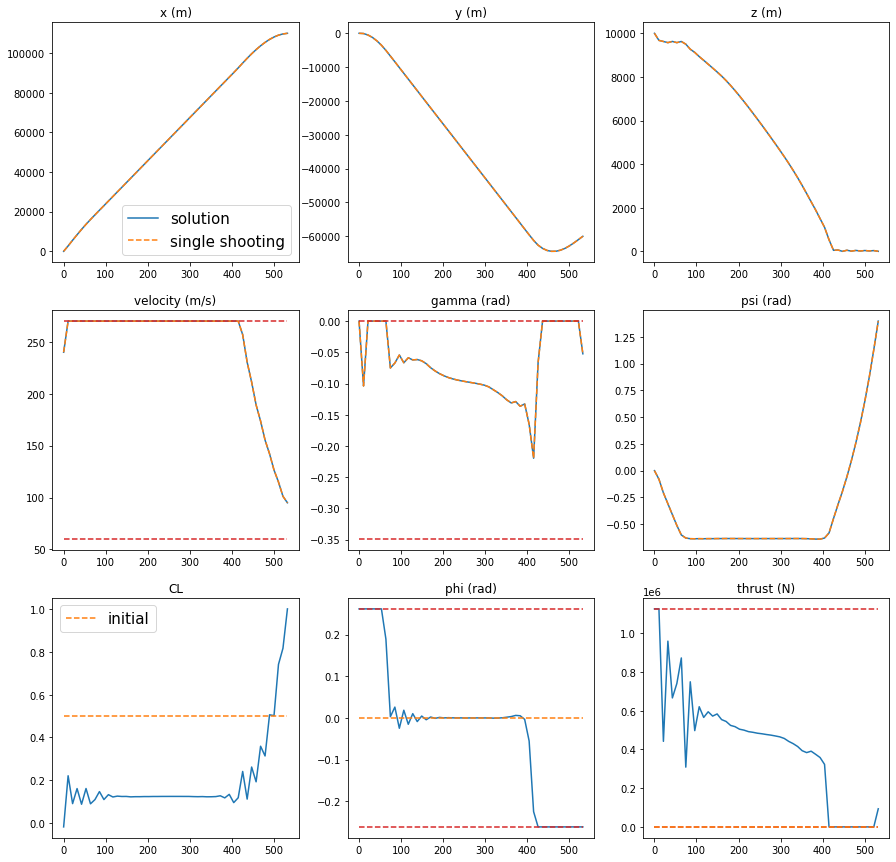

In [16]:
t_index = np.array([i for i in range(N+1)]) / N * tfbar
plt.figure(figsize=(15,15))
plt.subplot(331)
plt.plot(t_index,xbar[:,0],label='solution')
plt.plot(t_index,x[:,0],'--',label='single shooting')
plt.legend(fontsize=15)
plt.title('x (m)')

plt.subplot(332)
plt.plot(t_index,xbar[:,1])
plt.plot(t_index,x[:,1],'--')
plt.title('y (m)')

plt.subplot(333)
plt.plot(t_index,xbar[:,2])
plt.plot(t_index,x[:,2],'--')
plt.title('z (m)')


plt.subplot(334)
plt.plot(t_index,xbar[:,3])
plt.plot(t_index,x[:,3],'--')
plt.plot(t_index,ubar[:,2]*0 + myConst.v_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.v_min,'--',color='tab:red')
plt.title('velocity (m/s)')

plt.subplot(335)
plt.plot(t_index,xbar[:,4])
plt.plot(t_index,x[:,4],'--')
plt.plot(t_index,ubar[:,2]*0 + myConst.gamma_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.gamma_min,'--',color='tab:red')
plt.title('gamma (rad)')

plt.subplot(336)
plt.plot(t_index,xbar[:,5])
plt.plot(t_index,x[:,5],'--')
plt.title('psi (rad)')

plt.subplot(337)
plt.plot(t_index,ubar[:,0])
# plt.plot(t_index,ubar[:,2]*0 + myConst.CL_max,'--',color='tab:red')
# plt.plot(t_index,ubar[:,2]*0 + myConst.CL_min,'--',color='tab:red')
plt.title('CL')
plt.plot(t_index,u0[:,0],'--',label='initial')
plt.legend(fontsize=15)
plt.subplot(338)
plt.plot(t_index,ubar[:,1])
plt.plot(t_index,ubar[:,2]*0 + myConst.phi_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.phi_min,'--',color='tab:red')
plt.title('phi (rad)')
plt.plot(t_index,u0[:,1],'--',label='initial')
plt.subplot(339)
plt.plot(t_index,ubar[:,2])
plt.plot(t_index,ubar[:,2]*0 + myConst.T_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.T_min,'--',color='tab:red')
plt.title('thrust (N)')
plt.plot(t_index,u0[:,2],'--',label='initial')

In [ ]:
T = 15.04 - 0.00649 * xbar[:,2] # celsius
p = 101.29 * np.power((T+273.1)/288.08,5.256)
rho = p / (0.2869 * (T + 273.1))

F_lift = 0.5 * rho * xbar[:,3] * xbar[:,3] * myModel.Sw * ubar[:,0]
F_draf = 0.5 * rho * xbar[:,3] * xbar[:,3] * myModel.Sw * (myModel.CD0 + myModel.K  * ubar[:,0] * ubar[:,0])

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(t_index,rho)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(338)
plt.plot(t_index,F_lift)
plt.title('Lift force (N)')

plt.subplot(339)
plt.plot(t_index,F_draf)
plt.title('Drag force (N)')

In [ ]:
for ubar_ in u_traj :
    plt.plot(t_index,ubar_[:,2],alpha=0.5,color='tab:blue')
# plt.title('CL')

In [ ]:
a = np.random.randn(3,2,3)
print(a)
print()
b = np.array([1,2,3])
print((a.T*b).T)

In [ ]:
a = np.random.randn(3,2)
print(a)
print(a.T*np.array([2,10,20]))